# WordClouds using TF-IDF

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time

### Importing dataset

In [3]:
filename = "files/data/train.csv"
df = pd.read_csv(filename)
labels = df['Label'].unique()

df.head()

,Id,Title,Content,Label
0,227464,"Netflix is coming to cable boxes, and Amazon i...",if you subscribe to one of three rinky-dink (...,Entertainment
1,244074,"Pharrell, Iranian President React to Tehran 'H...","pharrell, iranian president react to tehran '...",Entertainment
2,60707,Wildlife service seeks comments,the u.s. fish and wildlife service has reopen...,Technology
3,27883,Facebook teams up with Storyful to launch 'FB ...,the very nature of social media means it is o...,Technology
4,169596,Caesars plans US$880 mln New York casino,caesars plans us$880 mln new york casino jul ...,Business


## Dataset preprocess

Applying Lemmatization using position tags. We use position tags in order to enable lemmatization, 
not only to nouns but also to all other parts of speech. Also removing stopwords, punctions and non alpha characters.

In [14]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
from gensim.utils import simple_preprocess

lmtzr = WordNetLemmatizer()

def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:    
      return None

my_stopwords = ENGLISH_STOP_WORDS.union(stopwords.words('english'))\
    .union(['include', 'way', 'work', 'look', 'add', 'time', 'year', 'month', 'day', 'help', 'think', 'tell', 'new', 'said', 'say','need', 'come', 'good', 'set', 'want', 'people', 'use', 'day', 'week', 'know'])

my_stopwords_lemma = set()
for word, nltk_tag in nltk.pos_tag(my_stopwords):
    tag = nltk2wn_tag(nltk_tag)
    if tag is not None:
        my_stopwords_lemma.add(lmtzr.lemmatize(word, tag))
    else:
        my_stopwords_lemma.add(word)
        

def documents_preprocess(documents):
    new_documents = []
    starting_tm = time.time()
    for doc in documents:
        clean_doc = []
        doc_tokens = simple_preprocess(doc, deacc=True)
        for word, nltk_tag in  nltk.pos_tag(doc_tokens):
            tag = nltk2wn_tag(nltk_tag)
            if tag is not None:
                lemma = lmtzr.lemmatize(word, tag)
                if lemma not in my_stopwords_lemma:
                    clean_doc.append(lemma)
            else:
                if word not in my_stopwords_lemma:
                    clean_doc.append(word)
        new_documents.append(clean_doc)
    
    print("Text Preprocessing took: " + str(time.time() - starting_tm))
    return new_documents

## WordCloud Generator

First extract the text of the selected category, clean it and produce the wordcloud .

In [15]:
def get_wordcloud(label):
    if label not in labels: 
        print("ERROR: Requested label \'" + label + "\' is not in dataframe'")
        return
    
    texts = df[df['Label'] == label]["Title"] + " " + df[df['Label'] == label]["Content"]
    clean_text_df = documents_preprocess(texts)
    clean_text = " ".join([" ".join(text_list) for text_list in clean_text_df])
    print(label)
    wc= WordCloud(width=800, height=600, mode='RGBA', background_color='white', max_words=200)\
        .generate(clean_text)
    plt.imshow(wc)
    plt.show()
    wc.to_file("../wordclouds/" + label + ".png")

Text Preprocessing took: 556.3242754936218
Entertainment
Text Preprocessing took: 384.43549132347107
Technology
Text Preprocessing took: 339.01179480552673
Business
Text Preprocessing took: 159.16623091697693
Health
Execution time: 1524.9298844337463


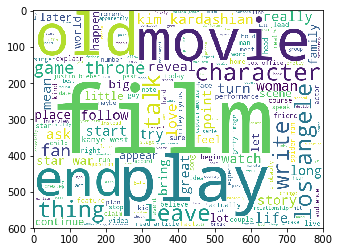

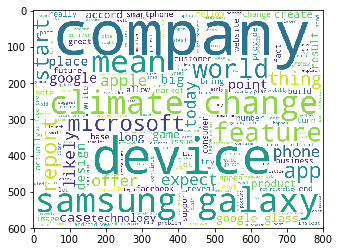

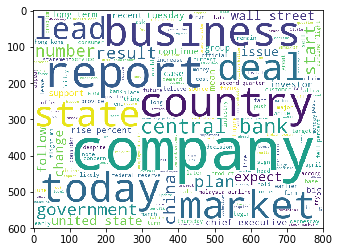

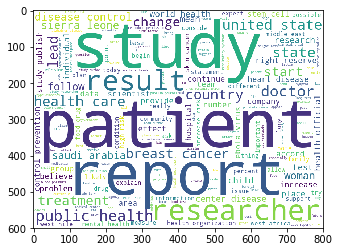

In [16]:
import time

start = time.time()
for l in labels:
    get_wordcloud(l)
print("Execution time: " + str(time.time() - start))